In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
data=pd.read_excel("/content/drive/MyDrive/Datasets/experience_salary_dataset.xlsx")
print(data.columns.tolist())
print(data)

['Experience (Years)', 'Salary (USD)']
    Experience (Years)  Salary (USD)
0                    1         25000
1                    2         30000
2                    3         35000
3                    4         40000
4                    5         45000
5                    6         50000
6                    7         60000
7                    8         65000
8                    9         70000
9                   10         80000
10                  11         85000
11                  12         90000
12                  13         95000
13                  14        100000
14                  15        110000
15                  16        120000
16                  17        125000
17                  18        130000
18                  19        140000
19                  20        150000


In [6]:
#step 1 initialize your dataset
X=data['Experience (Years)'].values
Y=data['Salary (USD)'].values

In [7]:
#step two make the function to calculate prediction value
def predictions(w,X,b):
  return w*X+b

In [8]:
#step 3 make the function to compute the cost
def compute_cost(w,X,b,Y):
  # cost = 1/2n sum of (y-prediction )** 2
  n=len(Y)
  predicted_Y=predictions(w,X,b)
  error=predicted_Y-Y
  cost=(1/(2*n))*np.sum(error ** 2)
  return cost

In [9]:
# print total cost
pairs = [(3,0),(6500,4500),(6000,5000),(7117,6000)]
for w, b in pairs:
  print(f"Cost for w={w}, b={b}: {compute_cost(w,X,b,Y)}")

Cost for w=3, b=0: 4083637145.75
Cost for w=6500, b=4500: 48687500.0
Cost for w=6000, b=5000: 109125000.0
Cost for w=7117, b=6000: 11203185.75


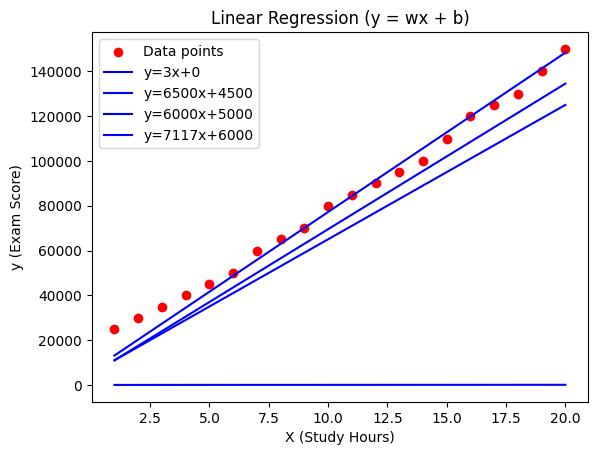

In [10]:
plt.scatter(X, Y, color="red", label="Data points")
for w, b in pairs:
  plt.plot(X, predictions(w, X, b), color="blue", label=f"y={w}x+{b}")
plt.legend()
plt.xlabel("X (Study Hours)")
plt.ylabel("y (Exam Score)")
plt.title("Linear Regression (y = wx + b)")
plt.show()

best w and b value is  w=6591.170012198515 b=12732.366494987768


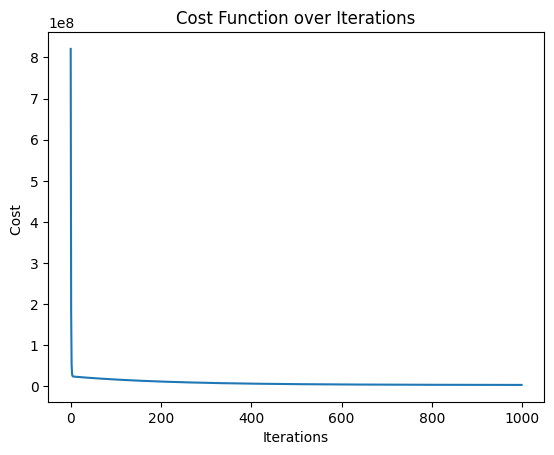

In [11]:
# problem : its too time consuming to give value of w and b to check our model fit the line or not .
# solution : lets model to choose best w and b by its self
# for this we use gradient descent algorithm  : so try it

w=0
b=0
costs=[]
alpha=0.01
for i in range(1000):
  #w=w-alpha*dw
  # dw = (-1/n)* sum of (y- predict_Y)x
  #so first calculte predictions
  n=len(Y)
  predict_Y=predictions(w,X,b)
  # calculte dw which is partial_cost /partial_w
  dw=(-1/n)* np.sum((Y-predict_Y)*X)
  # calculte db which is partial_cost /partial_b
  db=(-1/n)* np.sum((Y-predict_Y))
  # update w and b
  w=w-alpha*dw
  b=b-alpha*db
  # calculate cost
  cost=compute_cost(w,X,b,Y)
  costs.append(cost)
print("best w and b value is ", f"w={w}",f"b={b}")

# Plot cost over time
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost ")
plt.title("Cost Function over Iterations")
plt.show()

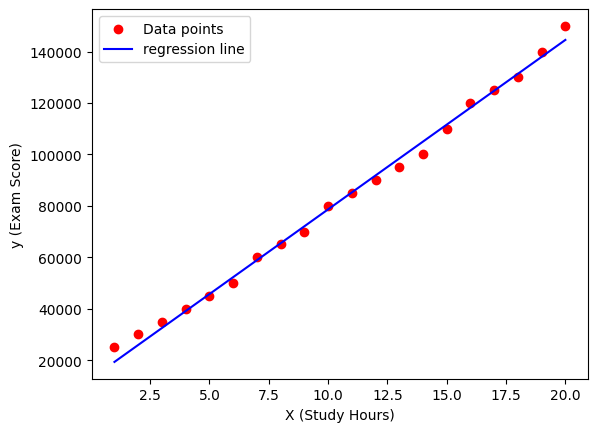

In [12]:
plt.scatter(X, Y, color="red", label="Data points")
plt.plot(X, predictions(w, X, b), color="blue", label="regression line")
plt.xlabel("X (Study Hours)")
plt.ylabel("y (Exam Score)")
plt.legend()
plt.show()

In [13]:
# letys do more fun with data set
# as  my dataset contain the large value difference between X= 1....10 while y= starts fromm 25 k to 150000
#so  it may cause slow or unstale learning . so lets normalize(scaling) it . This make gradient descent easy to choose best value of b and w
X_scaled=(X - X.mean())/X.std()
w = 0
b = 0
learning_rate = 0.01
iterations = 1000
m = len(X)
costs = []
for i in range(iterations):
    y_pred = w * X_scaled + b             # Prediction
    cost = np.mean((y_pred - Y)**2)       # Mean squared error
    dw = (2/m) * np.sum((y_pred - Y) * X_scaled)
    db = (2/m) * np.sum(y_pred - Y)

    w = w - learning_rate * dw
    b = b - learning_rate * db

    costs.append(cost)
print(w,b)


37437.47287119782 82249.99986157595


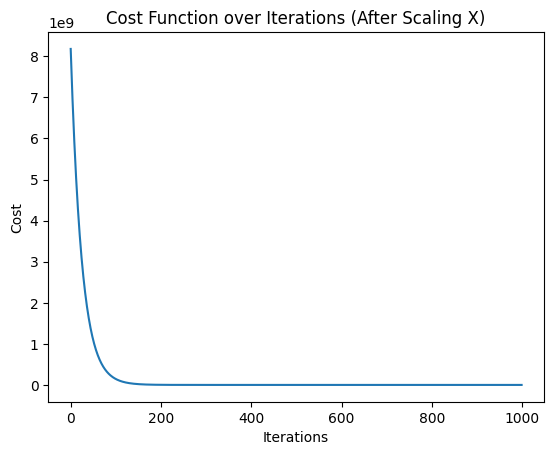

In [14]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations (After Scaling X)")
plt.show()


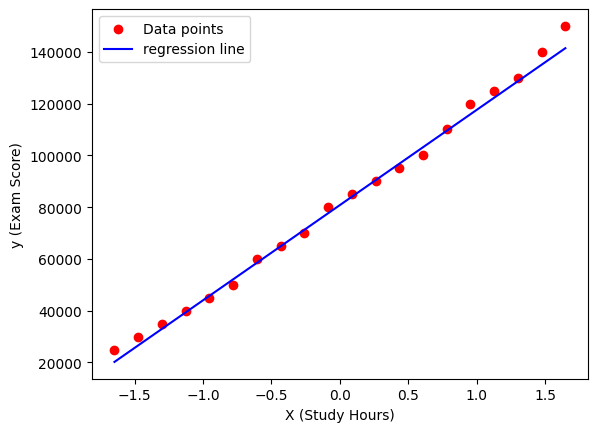

In [ ]:
y_predict=w * X_scaled + b
plt.scatter(X_scaled, Y, color="red", label="Data points")
plt.plot(X_scaled,y_predict, color="blue", label="regression line")
plt.xlabel("X (Study Hours)")
plt.ylabel("y (Exam Score)")
plt.legend()
plt.show()

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Normalize X for stable learning
X_scaled = (X - X.mean()) / X.std()
m = len(X)
w = 0
b = 0
learning_rate = 0.01
iterations = 200
w_history = []
b_history = []
for i in range(iterations):
    y_pred = w * X_scaled + b
    dw = (2/m) * np.sum((y_pred - Y) * X_scaled)
    db = (2/m) * np.sum(y_pred - Y)
    w = w - learning_rate * dw
    b = b - learning_rate * db

    w_history.append(w)
    b_history.append(b)

fig, ax = plt.subplots()
ax.scatter(X, Y, color='red', label='Data Points')
line, = ax.plot([], [], color='blue', label='Model Line')

ax.set_xlabel("Experience (Years)")
ax.set_ylabel("Salary (USD)")
ax.set_title("Gradient Descent Animation (y = wx + b)")
ax.legend()

def update(i):
    w_i = w_history[i]
    b_i = b_history[i]
    y_pred = w_i * X_scaled + b_i
    line.set_data(X, y_pred)
    ax.set_title(f"Iteration {i+1}: w={w_i:.2f}, b={b_i:.2f}")
    return line,

ani = FuncAnimation(fig, update, frames=len(w_history), interval=100, repeat=False)

# Save the animation as an MP4 file
ani.save('gradient_descent_animation.mp4', writer='ffmpeg')

plt.close(fig) # Close the figure to prevent displaying a static plot

# Display the animation in the notebook
HTML(ani.to_html5_video())

**Watch Animation:**

 https://drive.google.com/file/d/1NCJUAYhoDGvlWF-_8-UKZBDdXEalyFU-/view?usp=sharing